In [1]:
import tfscreen
from tfscreen.plot import heatmap
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Categorizer

Functions to fit values vs. IPTG to extract hill fits and categorize theta profiles

In [2]:
theta_file = "theta.csv"

# Load dataframe and make genotype into categorical
df = tfscreen.util.read_dataframe(theta_file)
df = tfscreen.genetics.set_categorical_genotype(df)

In [3]:

# Grab wildtype
wt_df = df[df["genotype"] == "wt"]

# This fits a bunch of models to the curve and returns three outputs (shown below)
every_model_dict, fit_summary_df, pred_df = tfscreen.analysis.cat_response(
    wt_df,
    x_column="titrant_conc",
    y_column="theta_est",
    y_std_column="theta_std",
    models_to_run=None # <- put a list here to fit specific models
)

# Summarize all fit results. This holds the best model and AIC weights for 
# all models. the w_{model_name} columns sum to 1, with the best model being
# the highest value.
fit_summary_df

,best_model,best_model_R2,best_model_AIC_weight,status,w_biphasic_dip,w_repressor,w_hill_repressor,w_bell_peak,w_flat,w_biphasic_peak,w_inducer,w_hill_inducer,w_bell_dip,w_linear
genotype,,,,,,,,,,,,,,
wt,biphasic_dip,0.99075,0.879888,success,0.879888,0.084334,0.034935,0.000843,1.289799e-07,4.328525e-08,1.729533e-08,6.362597e-09,6.362578e-09,2.285837e-13


In [4]:
# This holds the predicted outputs for each model
pred_df

,model,x,y,y_std,is_best_model,genotype
genotype,,,,,,
wt,flat,0.000000,1.287360,0.169380,False,wt
wt,flat,0.000045,1.287360,0.169380,False,wt
wt,flat,0.000050,1.287360,0.169380,False,wt
wt,flat,0.000056,1.287360,0.169380,False,wt
wt,flat,0.000062,1.287360,0.169380,False,wt
...,...,...,...,...,...,...
wt,biphasic_dip,1.607166,0.723972,0.081898,True,wt
wt,biphasic_dip,1.796989,0.732417,0.089337,True,wt
wt,biphasic_dip,2.009233,0.740314,0.096753,True,wt


In [5]:
# This is a dictionary holding the model fit parameters. 
print(list(every_model_dict.keys()))
# Get hill repressor fit parameters
every_model_dict["hill_repressor"]

['flat', 'linear', 'repressor', 'inducer', 'hill_repressor', 'hill_inducer', 'bell_peak', 'bell_dip', 'biphasic_peak', 'biphasic_dip']


,baseline_est,amplitude_est,lnK_est,n_est,baseline_std,amplitude_std,lnK_std,n_std,is_best_model,R2,AIC_weight
genotype,,,,,,,,,,,
wt,1.747323,-1.139518,-4.203894,1.145489,0.062393,0.116979,0.288554,0.32739,False,0.979277,0.034935


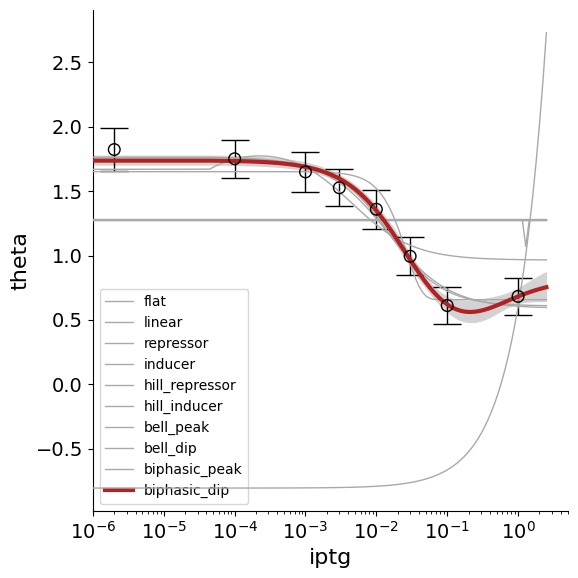

In [6]:
# Plot all model fits. 
fig, ax = tfscreen.plot.cat_fits(wt_df["titrant_conc"],
                                 wt_df["theta_est"],
                                 wt_df["theta_std"],
                                 pred_df,
                                 xlog=True,
                                 xlabel="iptg",
                                 ylabel="theta")
#fig.savefig("name-of-file.pdf")

In [7]:
# Fit first 500 lines of dataframe. The outputs will now have information for
# many genotypes

df_fit_dict, df_fit_summary, df_pred_df = tfscreen.analysis.cat_response(
    df.loc[:500], # set to 'df' to fit everything. will take hours.
    x_column="titrant_conc",
    y_column="theta_est",
    y_std_column="theta_std",
    models_to_run=None # <- put a list here to fit specific models. Otherwise, do all.
)

# Print all genotypes where a biphasic_dip is the best model 
df_fit_summary[df_fit_summary["best_model"] == "biphasic_dip"]

,best_model,best_model_R2,best_model_AIC_weight,status,w_biphasic_dip,w_repressor,w_hill_repressor,w_bell_peak,w_flat,w_biphasic_peak,w_inducer,w_hill_inducer,w_bell_dip,w_linear
genotype,,,,,,,,,,,,,,
wt,biphasic_dip,0.990750,0.879888,success,0.879888,0.084334,0.034935,0.000843,1.289799e-07,4.328525e-08,1.729533e-08,6.362597e-09,6.362578e-09,2.285837e-13
H29A,biphasic_dip,0.984188,0.692991,success,0.692991,0.217956,0.085982,0.003069,8.673032e-07,2.277616e-07,1.162391e-07,4.276210e-08,5.805472e-07,2.151284e-12
H29C,biphasic_dip,0.985052,0.647687,success,0.647687,0.245243,0.104664,0.002405,6.474213e-07,1.788448e-07,8.679086e-08,3.192853e-08,3.905734e-07,7.807813e-13
H29P,biphasic_dip,0.963904,0.439252,success,0.439252,0.401064,0.148155,0.011498,1.492574e-05,2.814732e-06,1.998854e-06,7.353377e-07,1.068335e-05,5.177344e-11
H29Y,biphasic_dip,0.955101,0.446477,success,0.446477,0.351682,0.159485,0.042305,3.638718e-05,5.948453e-06,4.900805e-06,1.802898e-06,1.802891e-06,1.193275e-11
S31A,biphasic_dip,0.989658,0.814639,success,0.814639,0.076224,0.104493,0.004644,1.861151e-07,5.704242e-08,2.475491e-08,9.106819e-09,9.106326e-09,6.132091e-13
S31R,biphasic_dip,0.973141,0.483214,success,0.483214,0.365488,0.141189,0.010098,5.033678e-06,1.117070e-06,6.740938e-07,2.479855e-07,3.223622e-06,1.444723e-11
A32C,biphasic_dip,0.990143,0.876532,success,0.876532,0.028667,0.082678,0.012122,1.651628e-07,5.076632e-08,2.193694e-08,8.070150e-09,8.070090e-09,5.707299e-13
A32F,biphasic_dip,0.980506,0.608622,success,0.608622,0.276662,0.110252,0.004463,1.758457e-06,4.175958e-07,2.351684e-07,8.651380e-08,8.651401e-08,4.491862e-12


,baseline_est,amplitude_est,lnK_est,n_est,baseline_std,amplitude_std,lnK_std,n_std,is_best_model,R2,AIC_weight
genotype,,,,,,,,,,,
wt,1.747323,-1.139518,-4.203894,1.145489,0.062393,0.116979,0.288554,0.327390,False,0.979277,0.034935
H29A,1.433373,-0.896676,-4.633720,1.122908,0.059366,0.102123,0.337989,0.360146,False,0.973358,0.085982
H29C,1.509301,-0.861526,-4.540086,1.153307,0.052522,0.091611,0.310589,0.350579,False,0.976424,0.104664
H29D,1.214628,-0.456449,-7.982595,0.350837,0.051922,0.104528,1.411056,0.208877,True,0.937813,0.912595
H29F,1.331662,-0.665726,-4.799955,1.004384,0.063791,0.109363,0.513908,0.440938,False,0.948609,0.162993
...,...,...,...,...,...,...,...,...,...,...,...
K33C,1.465526,-0.936584,-4.545187,1.133048,0.073395,0.127835,0.398627,0.435573,False,0.961824,0.102956
K33D,1.332077,-0.842508,-5.835827,0.639282,0.096697,0.161595,0.733093,0.284336,False,0.948265,0.348701
K33F,1.729327,-1.240817,-3.997856,1.770240,0.056258,0.101024,0.196408,0.515362,True,0.982027,0.679235


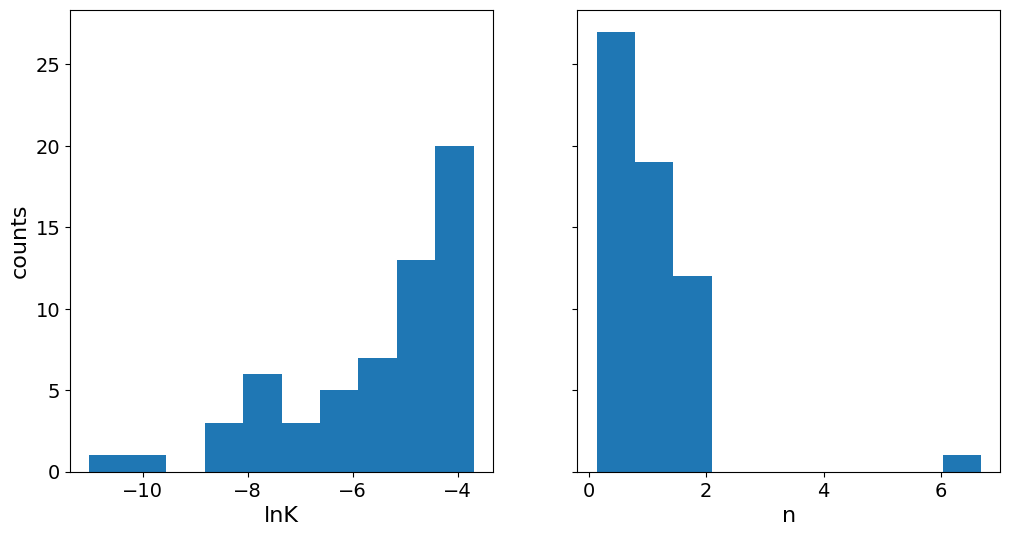

In [8]:
# get all hill fits
hill_fits = df_fit_dict["hill_repressor"]

# Plot histograms of values for all fits
fig, ax = plt.subplots(1,2,figsize=(12,6),sharey=True)
ax[0].hist(hill_fits["lnK_est"])
ax[0].set_xlabel("lnK")
ax[0].set_ylabel("counts")

ax[1].hist(hill_fits["n_est"])
ax[1].set_xlabel("n")

hill_fits